In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [4]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
training_sentences = sentences[0: training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0: training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                              padding=padding_type, truncating=trunc_type)

In [10]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                   validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 2s 2ms/step - loss: 0.6824 - accuracy: 0.5651 - val_loss: 0.5916 - val_accuracy: 0.6230
Epoch 2/30
625/625 [==============================] - 1s 2ms/step - loss: 0.4842 - accuracy: 0.8094 - val_loss: 0.3833 - val_accuracy: 0.8408
Epoch 3/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8681 - val_loss: 0.3827 - val_accuracy: 0.8240
Epoch 4/30
625/625 [==============================] - 1s 2ms/step - loss: 0.2636 - accuracy: 0.8972 - val_loss: 0.3778 - val_accuracy: 0.8293
Epoch 5/30
625/625 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9138 - val_loss: 0.3548 - val_accuracy: 0.8436
Epoch 6/30
625/625 [==============================] - 1s 2ms/step - loss: 0.1965 - accuracy: 0.9271 - val_loss: 0.3580 - val_accuracy: 0.8542
Epoch 7/30
625/625 [==============================] - 1s 2ms/step - loss: 0.1697 - accuracy: 0.9385 - val_loss: 0.3764 - val_accuracy: 0.8460
Epoch 

In [18]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

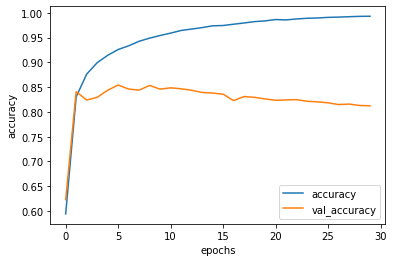

In [19]:
plot_graphs(history, "accuracy")

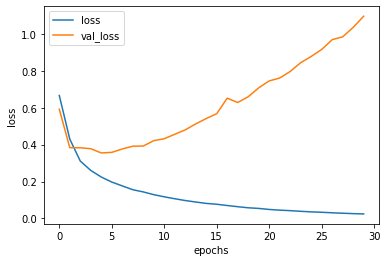

In [20]:
plot_graphs(history, "loss")

In [21]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [23]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)
